In [60]:
import pyvisa
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from scipy import optimize
import h5py
import time
import tqdm
from typing import List, Tuple, Sequence

#### System parameters

In [ ]:
N = 15       # number of loops
lc = 0.1     # magnetic core length / m

In [ ]:
def get_data(fname):
    z = []
    B = []
    for i in range(1, 6):
        with h5py.File(fname, "a") as f:
            dset = f[f"R-{i}"]
            B0, B90, B180, B270, B360 = [dset[:, i] * 100 for i in range(5)]
            Bread = [B0, B90, B180, B270, B360]
            posi = int(dset.attrs["position"])
            B.append(Bread)
            z.append(posi)
    return B, z

In [48]:
fname = "hystersis_2_23_2024.hdf"
Vin = []
Vpick = []
Vamp = [0.5,1,2,5,10]
with h5py.File(fname, "a") as f:
    for i in range(1, 6):
        dset = f[f"1000-{i}"]
        Vin.append(dset[0])
        Vpick.append(dset[1])

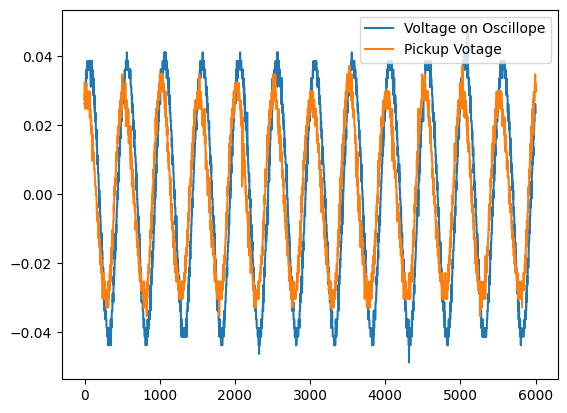

In [26]:
plt.plot(Vin[0], label =  "Voltage on Oscillope")
plt.plot(Vpick[0], label =  "Pickup Votage")
plt.legend()

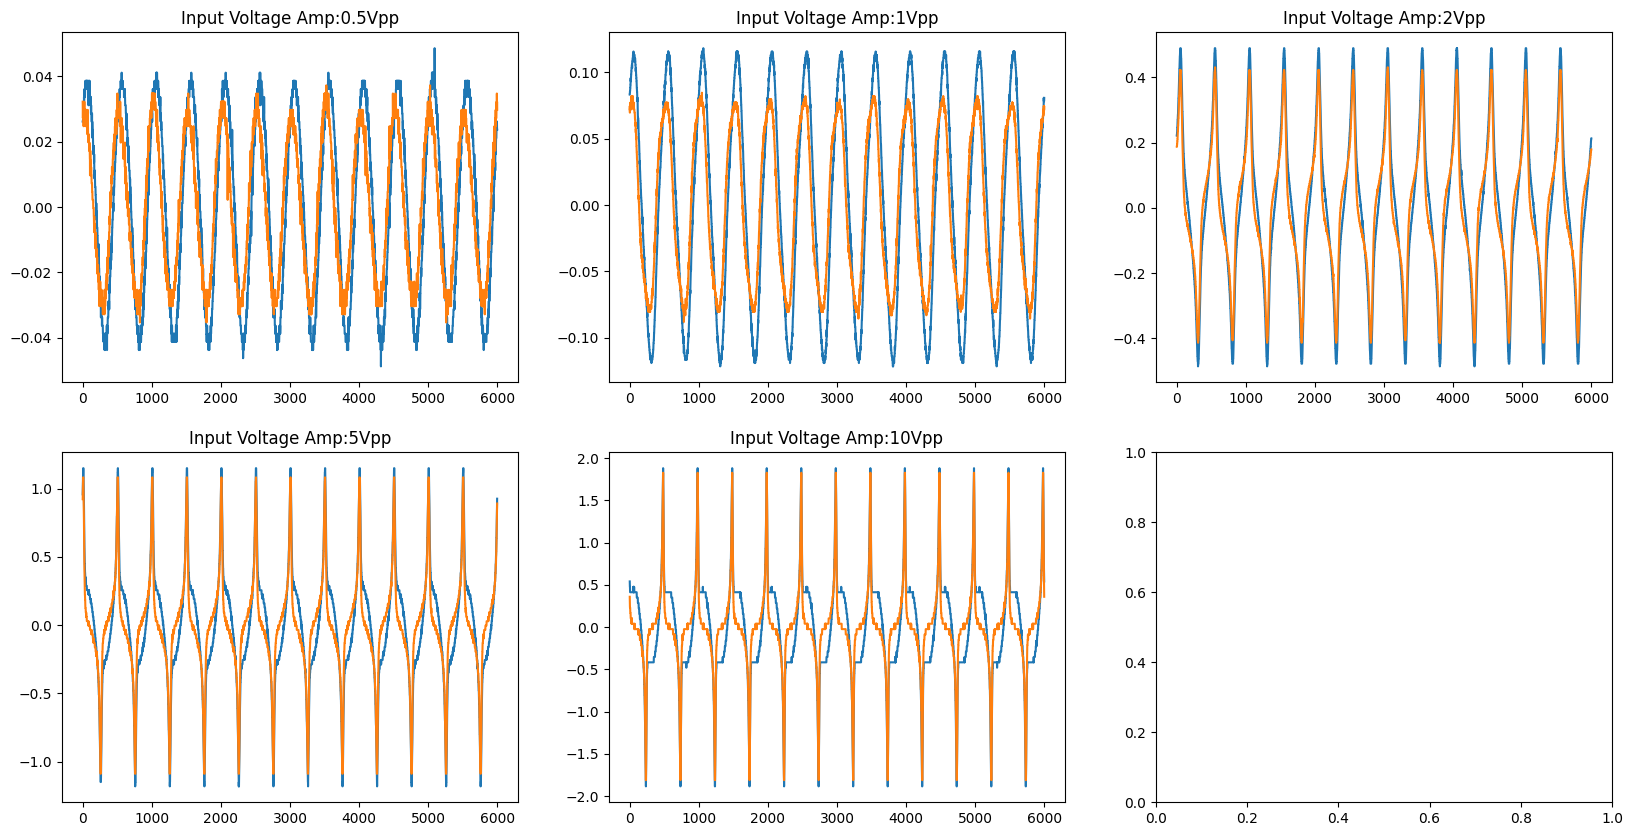

In [51]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
for i in range(5):
    if i < 3 :
        ax[0,i].plot(Vin[i])
        ax[0,i].plot(Vpick[i])
        ax[0,i].set_title("Input Voltage Amp:" + str(Vamp[i])+"Vpp")
    else:
        ax[1,i-3].plot(Vin[i])
        ax[1,i-3].plot(Vpick[i])
        ax[1,i-3].set_title("Input Voltage Amp:" + str(Vamp[i])+"Vpp")

In [55]:
Vin = []
Vpick = []
fre =  ["50","100","500","1000","5000","20000"]
with h5py.File(fname, "a") as f:
    for i in fre:
        dset = f[f"{i}-1"]
        Vin.append(dset[0])
        Vpick.append(dset[1])

Text(0.5, 0.98, 'Input: 0.5Vpp')

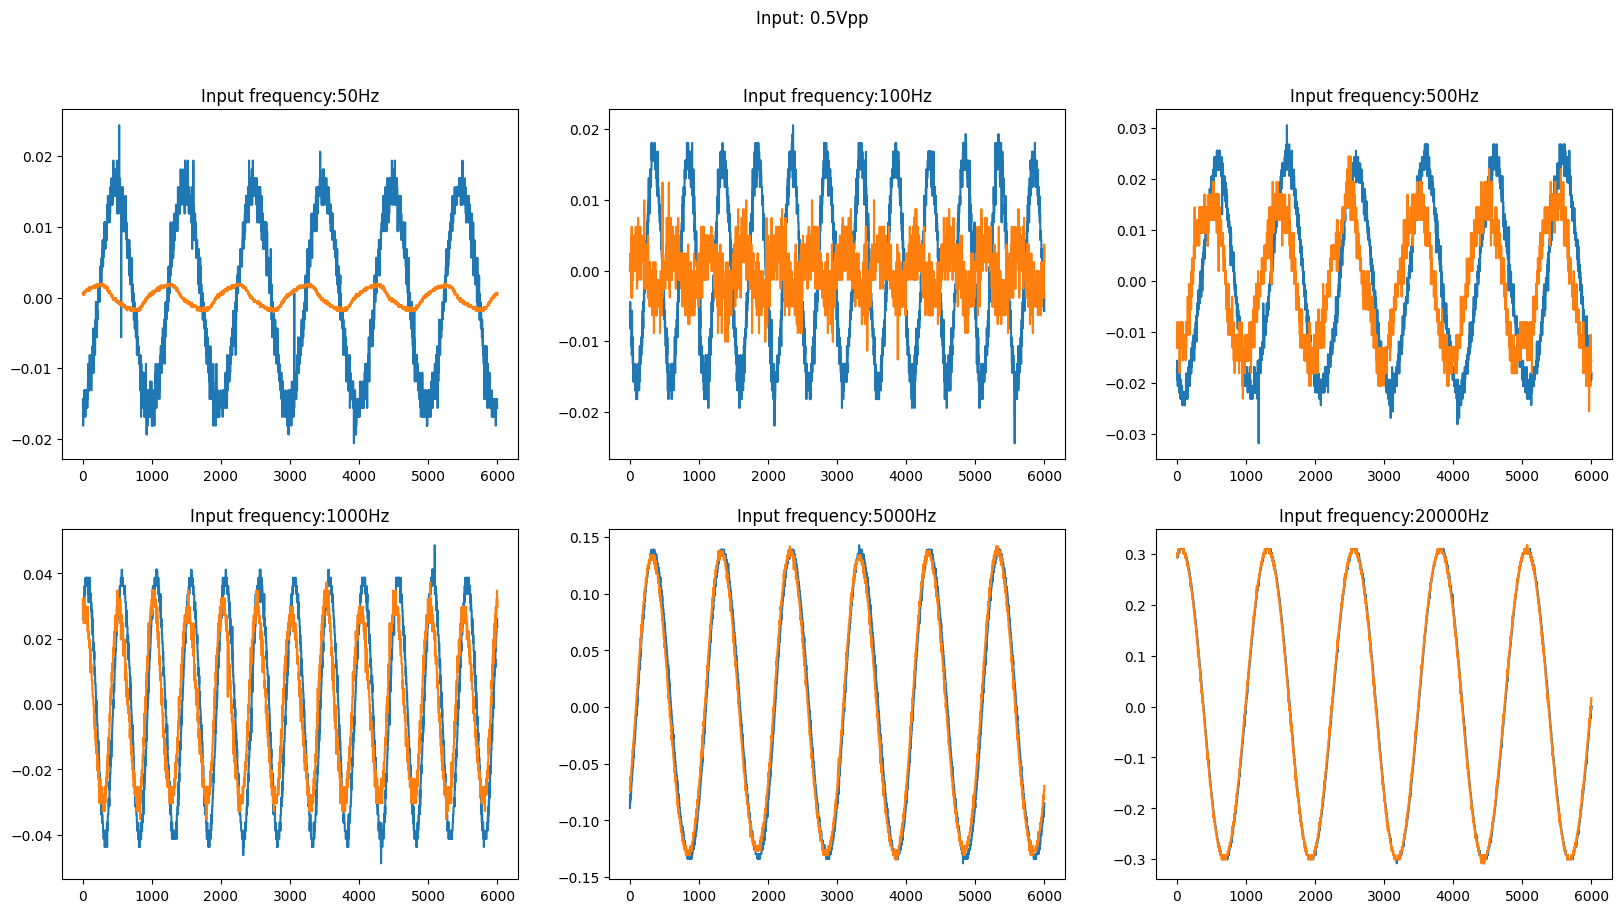

In [59]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
for i in range(6):
    if i < 3 :
        ax[0,i].plot(Vin[i])
        ax[0,i].plot(Vpick[i])
        ax[0,i].set_title("Input frequency:" + str(fre[i])+"Hz")
    else:
        ax[1,i-3].plot(Vin[i])
        ax[1,i-3].plot(Vpick[i])
        ax[1,i-3].set_title("Input frequency:" + str(fre[i])+"Hz")

fig.suptitle("Input: 0.5Vpp")

In [98]:
def test_func(x, a, b , c):
    return a * np.sin(b * x + c)

def sin_fit(raw_data, Vset, fre, time_factor):
    x_data = np.linspace(0 , 12/fre, len(raw_data))
    y_data = raw_data
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=[0.5, time_factor*fre,0])
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, test_func(x_data, params[0], params[1],params[2]),label='Fitted function',color = "r")
    plt.legend(loc='best')
    plt.show()
    return params

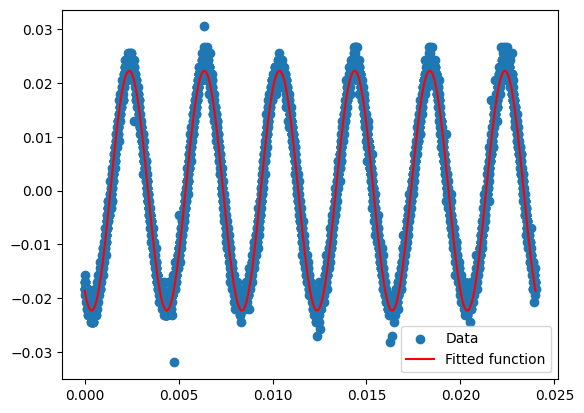

array([ 2.22836579e-02,  1.57103876e+03, -2.15505322e+00])

In [104]:
sin_fit(Vin[2],2,500,3)